In [2]:
from sklearn.datasets import load_diabetes
import pandas as pd

In [4]:
# Load
data = load_diabetes()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

In [5]:
df.head

<bound method NDFrame.head of           age       sex       bmi        bp        s1        s2        s3  \
0    0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1   -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2    0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3   -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4    0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   
..        ...       ...       ...       ...       ...       ...       ...   
437  0.041708  0.050680  0.019662  0.059744 -0.005697 -0.002566 -0.028674   
438 -0.005515  0.050680 -0.015906 -0.067642  0.049341  0.079165 -0.028674   
439  0.041708  0.050680 -0.015906  0.017293 -0.037344 -0.013840 -0.024993   
440 -0.045472 -0.044642  0.039062  0.001215  0.016318  0.015283 -0.028674   
441 -0.045472 -0.044642 -0.073030 -0.081413  0.083740  0.027809  0.173816   

           s4        s5        s6  target  
0

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
 10  target  442 non-null    float64
dtypes: float64(11)
memory usage: 38.1 KB


In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

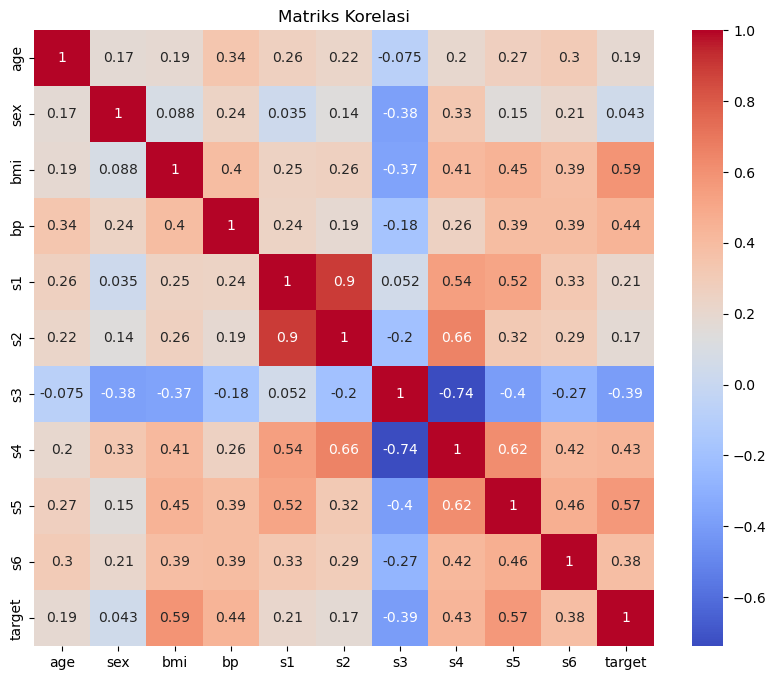

In [12]:
correlation_matrix = df.corr()

plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Matriks Korelasi")
plt.show()

In [13]:
correlated_features = correlation_matrix['target'].sort_values(ascending=False)
print("Most Correlated Features with Target")
print(correlated_features)

Most Correlated Features with Target
target    1.000000
bmi       0.586450
s5        0.565883
bp        0.441482
s4        0.430453
s6        0.382483
s1        0.212022
age       0.187889
s2        0.174054
sex       0.043062
s3       -0.394789
Name: target, dtype: float64


In [14]:
from sklearn.feature_selection import mutual_info_regression

In [16]:
# Separate features and traget
X = df.drop(columns=['target'])
y = df['target']

In [17]:
# Calculate mutual information
mutual_info = mutual_info_regression(X, y)

In [19]:
# create a dataframe for a better visulization
mi_df = pd.DataFrame({'Feature': X.columns, "Mutual Information": mutual_info})
mi_df = mi_df.sort_values(by="Mutual Information", ascending=False)

print("Mutual Informatiion")
print(mi_df)

Mutual Informatiion
  Feature  Mutual Information
2     bmi            0.169220
8      s5            0.147990
9      s6            0.109444
7      s4            0.109363
6      s3            0.071679
4      s1            0.070096
3      bp            0.065373
1     sex            0.048889
5      s2            0.011485
0     age            0.000000


In [20]:
# Pakai random forest
from sklearn.ensemble import RandomForestRegressor
import numpy as np

In [21]:
model = RandomForestRegressor(random_state=42)
model.fit(X, y)

RandomForestRegressor(random_state=42)

In [22]:
# Melihat featrues importance
feature_importance = model.feature_importances_
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importance})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

In [23]:
importance_df

,Feature,Importance
8,s5,0.315629
2,bmi,0.276249
3,bp,0.087085
9,s6,0.070775
0,age,0.057496
5,s2,0.055368
6,s3,0.051191
4,s1,0.047251
7,s4,0.027056
1,sex,0.011901


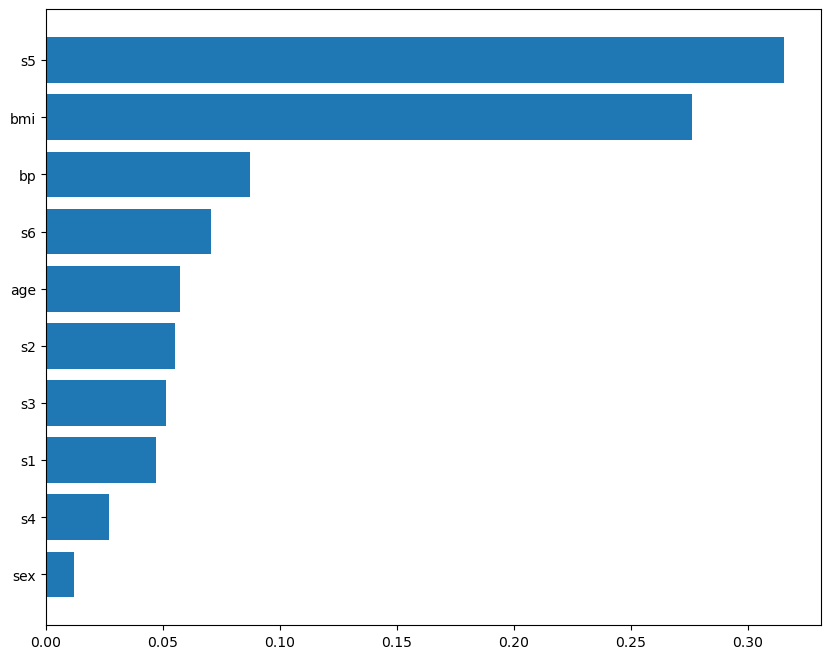

In [24]:
plt.figure(figsize=(10, 8))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.gca().invert_yaxis()
plt.show()